# **Ciencia de Datos e Inteligencia Artificial para la industria del software**

## **Edición 2023**

---
## Actividad integral de repaso

* Análisis exploratorio de datos.

* Visualización de datos.

* Datos faltantes.

* Modelos de regresión.



#### Importamos librerias necesarias

In [1]:
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargar la base de datos

Usaremos el Dataset `housing.csv` de [Censo California](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

#### Acerca del conjunto de datos

##### Contenido

Los datos contienen información del censo de California de 1990. Refieren a las casas que se encuentran en un determinado distrito de California y algunas estadísticas resumidas. Hay que tener en cuenta que los datos no están depurados, por lo que se requieren algunos pasos de preprocesamiento. Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitud --> longitude

* latitud --> latitude

* edad_media_vivienda --> housing_median_age

* total_habitaciones --> total_rooms

* total_habitaciones --> total_bedrooms

* población --> population

* hogares --> households

* ingresos_medianos --> median_income

* valor_medio_de_la_vivienda --> median_house_value

* proximidad_al_océano --> ocean_proximity

[Descripción variables](https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=es-419)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/CCDAA/Data/'
ruta_archivo = pathCurso + "housing.csv"

Mounted at /content/drive


In [3]:
# Leer la base de datos
# ...
df = pd.read_csv(ruta_archivo)

Solución:
<!--

df = pd.read_csv(ruta_archivo)

-->

## Análisis exploratorio descriptivo:

* 1- Retornar visualizacion de las primeras filas y columnas.

* 2- Nombre columnas.

* 3- Dimensiones del data frame.

* 4- Informacion general de cada una de las columnas.

* 5- Cantidad de valores ausentes.

* 6- Tipo de cada columna.

* 7- Descripcion de las principales variables.

In [ ]:
# Codigo:
# ...


Solución:

<!-- display(df.head())

display(df.columns)

display(df.shape)

display(df.isna().sum())

display(df.dtypes)

display(df.describe()) -->


## Análisis de visualización:

* 1- Matriz de correlación.

* 2- Box plot de 'ocean_proximity' vs 'median_house_value'

* 3- Pairsplot.

In [ ]:
# Codigo
# ...


Solución:

<!--

# * 1- Matriz de correlación.

sns.heatmap(df.corr(numeric_only = True), annot=True, annot_kws={"fontsize":8})

plt.show()

# * 2- Box plot de 'ocean_proximity' vs 'median_house_value'

sns.boxplot(x="ocean_proximity", y="median_house_value", data=df)

plt.show()

# * 3- Pairsplot.

sns.pairplot(data=df)

-->

## Datos faltantes

* 1- Rellenar los valores faltantes con la media de la variable.

* 2- Chequear que no haya mas valores faltantes en la base de datos.

In [ ]:
# Codigo
# ...

Solución:

<!--
df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)

df.isnull().sum()
 -->

## Codificación de las variables

* 1- Análizar las distintas escalas de las variables numéricas que hay en la base de datos, es necesario estandarizar?.

* 2- Análizar la cantidad de valores que toma por categoria la única variable categórica "ocean_proximity".

* 3- Estandarizar las variables númericas con StandardScaler(). Recuerda dropear la variable categorica.

* 4- Codificar la variable categórica con OneHotEncoder().

* 5- Unificar los datos en un único dataframe distinto del original.

In [64]:
# Codigo
# ...

* 1.

df_estandarizado = StandardScaler.fit_transform(df)

x_train,x_test =

* 2.

x_train,x_test =

scaler = StandardScaler()

x_train_estandarizado = scaler.fit_transform(x_train)

x_test_estandarizado = scaler.transform(x_test)

Solución:

<!--

# 1-

display(df.describe())

# 2-

display(df.ocean_proximity.value_counts())

# 3- Estandarizar las variables númericas con StandardScaler(). Recuerda dropear la variable categorica.

from sklearn.preprocessing import StandardScaler

df_est = df.copy(deep=True)

df_est.drop('ocean_proximity', inplace=True, axis=1)

scaler = StandardScaler()

df_est = scaler.fit_transform(df_est)

df_est = pd.DataFrame(df_est, columns = df.columns[:-1])

# 4- Codificar la variable categórica con OneHotEncoder().

df_onehot = df.copy(deep=True)

from sklearn.preprocessing import OneHotEncoder

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajustar y transformar los datos
df_encoded = encoder.fit_transform(df_onehot[['ocean_proximity']]).toarray()

df_encoded

# 5- Unificar los datos en un único dataframe distinto del original.

df_encoded = pd.DataFrame(df_encoded, columns = encoder.get_feature_names_out(['ocean_proximity']))

datos = pd.concat([df_est, df_encoded], axis=1)

-->

## Modelado predictivo:

* 1- Train test split (80% - 20%).

* 2- Ajustar un RandomForest.

* 3- Ajustar un LightGBM.

* 4- Comparar el desempeño.

## Repaso Modelos de Regresión

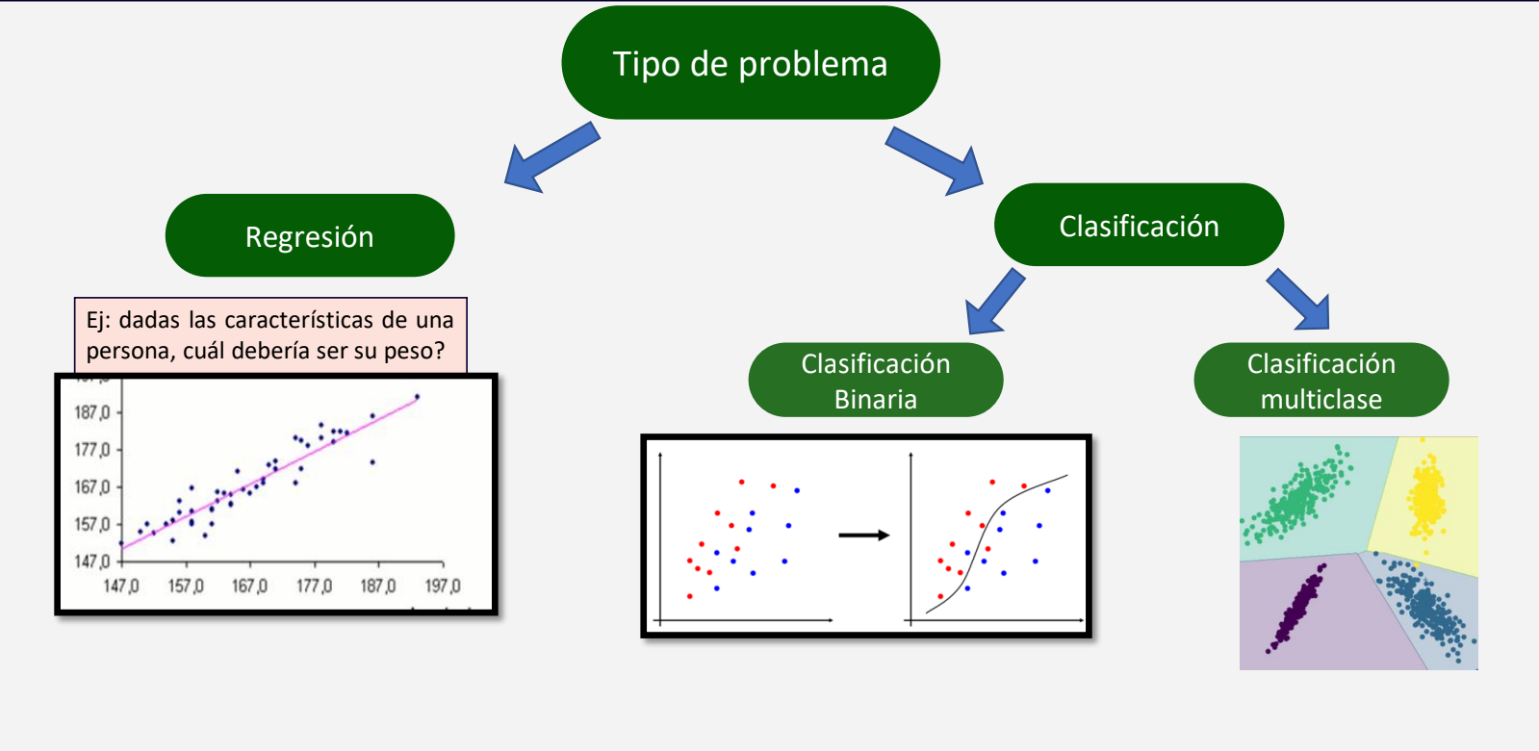

### Objetivos de la regresión

* Predecir una variable numérica.

Ejemplos:
- Precio de una casa
- Precio de acciones
- Nota de un examen

Consiste en predecir un valor numérico "y" en base a los atributos "X" (x1, x2, x3, ..., xn).

Un *modelo de regresión* proporciona una función que describe la relación entre una o más variables independientes y una variable respuesta, dependiente u objetivo.

Por ejemplo, la relación entre la altura y el peso puede describirse mediante un modelo de regresión lineal. Un análisis de regresión es la base de la predicción y estudio de los efectos sobre las variables objetivo.

### 1- Division de datos Train-Test Split (datos de entrenamiento y testeo)

La división entrenamiento-testeo es una técnica para evaluar el rendimiento de un algoritmo de aprendizaje automático.

Puede utilizarse para problemas de clasificación o regresión y para cualquier algoritmo de aprendizaje supervisado.

El procedimiento consiste en tomar un conjunto de datos y dividirlo en dos subconjuntos. El primer subconjunto se utiliza para ajustar el modelo y se denomina conjunto de datos de **entrenamiento**. El segundo subconjunto no se utiliza para entrenar el modelo; en su lugar, se proporciona al modelo el elemento de entrada del conjunto de datos y, a continuación, se realizan predicciones y se comparan con los valores esperados. Este segundo conjunto de datos se denomina conjunto de datos de **testeo**.

**Conjunto de datos de entrenamiento:** Se utiliza para ajustar el modelo de aprendizaje automático.

**Conjunto de datos de prueba:** Se utiliza para evaluar el modelo de aprendizaje automático ajustado.

In [92]:
# Seleccionamos las variables de interes y dividimos en features y respuesta.

x = datos.loc[:, datos.columns != 'median_house_value']

y= datos['median_house_value']

### Procedimiento de división entenamiento-prueba en Scikit-Learn

La biblioteca de aprendizaje automático scikit-learn Python proporciona una implementación del procedimiento de evaluación de la división tren-prueba a través de la función [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

La función toma un conjunto de datos cargado como entrada y devuelve el conjunto de datos dividido en dos subconjuntos.

In [93]:
# Importamos la libreria

from sklearn.model_selection import train_test_split

In [100]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16512, 13) (4128, 13) (16512,) (4128,)


### Metricas de evaluación de modelos

Es importante destacar que muchas veces tenemos que elegir cual es el mejor modelo que ajusta a nuestros datos, para ello debemos compararlos, esto se realiza a partir de metricas.

Existen muchas métricas para determinar el rendimiento de los modelos de aprendizaje automático. Es beneficioso saber qué métrica de evaluación medirá adecuadamente el rendimiento. Algunas métricas miden el rendimiento del modelo mejor que otras, dependiendo de cada caso de uso. Repasaremos algunas de las métricas de evaluación más comunes para los problemas de regresión.

### MAE (Mean Absolute Error)

El error absoluto medio calcula la diferencia absoluta entre los valores observados y los valores predichos del modelo. El MAE es una buena referencia, ya que analiza el error absoluto. El problema de utilizar MAE es que la métrica es relativa a los valores y residuos. Por ejemplo, ¿qué se considera un MAE bueno o malo? Obviamente le gustaría tener MAE cerca de 0, pero cuando sus errores son valores grandes se hace más difícil evaluar su modelo usando MAE.


Fórmula para calcular MAE:

$$MAE = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|$$

### MSE (Mean Squared Error)

El error cuadrático medio calcula el error y luego eleva la diferencia al cuadrado, antes de calcular la media o promedio. MSE es otra buena métrica para utilizar como referencia, ya que es una métrica de evaluación fundamental como MAE. Sin embargo, el MSE infla los errores, ya que cada valor se eleva al cuadrado. De nuevo, esto dificulta la evaluación del modelo.

Fórmula para calcular el MSE:

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

### RMSE (Root Mean Squared Error)

El la raiz del error cuadrático medio es igual que el error cuadrático medio, pero tomando la raíz cuadrada del resultado. El RMSE es otra métrica de evaluación fundamental basada en el cuadrado de los residuos, pero penaliza más los errores más grandes.

Fórmula para calcular el RMSE:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}$$

### MAPE (Mean Absolute Percentage Error)

El Error Medio Porcentual Absoluto intenta resolver el problema del MAE. En el que MAE se convierte en relativo basado en la escala de sus residuos. MAPE transformará los errores en porcentajes, donde usted desea que su MAPE sea lo más cercano a 0 como sea posible. También existen otras métricas que utilizan valores absolutos y porcentajes. (por ejemplo, APE, MAPE ponderado, MAPE simétrico, etc.)

Fórmula para calcular el MAPE:

$$MAPE = \frac{1}{N} \sum_{i=1}^{N} {|\frac{y_i - \hat{y}_i}{y_i}|}$$

### MASE (Mean Absolute Scaled Error)

El MASE es una métrica que permite comparar dos modelos. Utilizando el MAE de cada modelo, puede poner el MAE del nuevo modelo en el numerador y el MAE del modelo original en el denominador. Si el valor MASE es inferior a 1, el nuevo modelo funciona mejor. Si el valor MASE es igual a 1, los modelos tienen el mismo rendimiento. Si el valor de MASE es superior a 1, el modelo original funciona mejor que el nuevo.

Fórmula para calcular MASE:

$$MASE = \frac{MAE_i}{MAE_j}$$

### Coeficiente de determinación $R^2$

Otra métrica de evaluación de modelos predictivos es el coeficiente de determinación (*coefficient of determination ($R^2$)*). Calculada bajo las predicciones en la base de datos de entrenamiento estima la proporción de la varianza de la variable respuesta que puede ser explicada por el modelo, brindando una medida de bondad de ajuste del modelo. Por otra parte, bajo una base de datos de testeo representa la capacidad predictiva del modelo ajustado. El $R^2$ toma valores entre 0 y 1, donde 0 indica que el modelo no explica nada de la variabilidad de la variable respuesta (entrenamiento), o bien que la capacidad predictiva del modelo es deficiente (testeo), mientras que 1 indica que el modelo explica la totalidad de la variabilidad (entrenamiento), o bien que estamos frente a un modelo perfecto (testeo).

\begin{equation*}
R^2 = \frac{SSR}{SST}
\end{equation*}
  
  Donde SSR es la suma de regresión al cuadrado también conocida como variación explicada por el modelo y SST es la variación total en los datos también conocida como suma total al cuadrado.

\begin{equation*}
SSR = \sum\nolimits_{i=1}^N(\hat{y_i}-\overline{y})^2
\end{equation*}

\begin{equation*}
SST = \sum\nolimits_{i=1}^N(y_i-\overline{y})^2
\end{equation*}

  Donde $y_i$ es el valor y para la observación i, $\overline{y}$ es la media del valor y y $\hat{y_i}$ es el valor predicho de y para la observación i.



# Algoritmos de regresión

Existen muchos otros algoritmos alternativos para resolver problemas de regresion.

[Supervised learning](https://scikit-learn.org/stable/supervised_learning.html)

>Se llama **aprendizaje supervisado** cuando tenemos datos etiquetados, es decir que para las caracteristicas o features contamos con las etiquetas o los datos de la variable que queremos predecir. De esta forma este aprendizaje se basa en enseñar al algoritmo de aprendizaje automatico a predecir la respuesta en funcion de las predictoras.

Ahora vamos a comparar otros enfoques de ajuste de modelos.


In [102]:
# Importamos metricas de ajuste de modelos de sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [103]:
results_test = pd.DataFrame(columns = ['Modelo',"root_mean_squared_error",'mean_absolute_error',"r2_score"])

In [104]:
results_test.head()

,Modelo,root_mean_squared_error,mean_absolute_error,r2_score


## Decision Tree Regression

In [105]:
# Importamos el modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [106]:
# Instanciamos el modelo
tree_mod = DecisionTreeRegressor()

In [107]:
# Entrenamos el modelo
tree_mod.fit(x_train, y_train)

DecisionTreeRegressor()

In [108]:
# Generamos predicciones
preds_tree = tree_mod.predict(x_test)

In [109]:
# Evaluamos el modelo
print(r2_score(y_test, preds_tree))
print(mean_squared_error(y_test, preds_tree, squared=False))
print(mean_absolute_error(y_test, preds_tree))

0.6330596735934105
0.6009278931773909
0.3822019455860414


In [110]:
# Incluimos resultados en el dataframe para comparar los modelos
import warnings
warnings.filterwarnings("ignore")

resultado_parcial = {"Modelo":"DecisionTreeRegressor",
"root_mean_squared_error":mean_squared_error(y_test, preds_tree, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds_tree),
"r2_score":r2_score(y_test, preds_tree)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

resultado_parcial

{'Modelo': 'DecisionTreeRegressor',
 'root_mean_squared_error': 0.6009278931773909,
 'mean_absolute_error': 0.3822019455860414,
 'r2_score': 0.6330596735934105}

## Multiple linear regression

In [111]:
# Importamos el modelo
from sklearn.linear_model import LinearRegression

In [112]:
# Instanciamos el modelo
model = LinearRegression()

In [113]:
# Entrenamos el modelo
model.fit(x_train, y_train)

LinearRegression()

In [114]:
# Generamos predicciones
preds = model.predict(x_test)

In [115]:
# Evaluamos el modelo
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds, squared=False))
print(mean_absolute_error(y_test, preds))

0.6257351821159705
0.6068958161720667
0.43938417358865894


In [116]:
# Incluimos resultados en el dataframe para comparar los modelos

resultado_parcial = {"Modelo":"LinearRegression",
"root_mean_squared_error":mean_squared_error(y_test, preds, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds),
"r2_score":r2_score(y_test, preds)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

resultado_parcial

{'Modelo': 'LinearRegression',
 'root_mean_squared_error': 0.6068958161720667,
 'mean_absolute_error': 0.43938417358865894,
 'r2_score': 0.6257351821159705}

## Support Vector Regression

In [117]:
# Importamos el modelo
from sklearn.svm import SVR

In [118]:
# Instanciamos el modelo
model = SVR()

In [119]:
# Entrenamos el modelo
model.fit(x_train, y_train)

SVR()

In [120]:
# Generamos predicciones
preds = model.predict(x_test)

In [121]:
# Evaluamos el modelo
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds, squared=False))
print(mean_absolute_error(y_test, preds))

0.7502282519405657
0.4957883279869125
0.3255239858095443


In [122]:
# Incluimos resultados en el dataframe para comparar los modelos

resultado_parcial = {"Modelo":"SVR",
"root_mean_squared_error":mean_squared_error(y_test, preds, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds),
"r2_score":r2_score(y_test, preds)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

resultado_parcial

{'Modelo': 'SVR',
 'root_mean_squared_error': 0.4957883279869125,
 'mean_absolute_error': 0.3255239858095443,
 'r2_score': 0.7502282519405657}

## KNeighborsRegressor

In [123]:
# Importamos el modelo
from sklearn.neighbors import KNeighborsRegressor

In [124]:
# Instanciamos el modelo
model = KNeighborsRegressor()

In [125]:
# Entrenamos el modelo
model.fit(x_train, y_train)

KNeighborsRegressor()

In [126]:
# Generamos predicciones
preds = model.predict(x_test)

In [127]:
# Evaluamos el modelo
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds, squared=False))
print(mean_absolute_error(y_test, preds))

0.711002601745918
0.5333000299493241
0.3543884612306135


In [128]:
# Incluimos resultados en el dataframe para comparar los modelos

resultado_parcial = {"Modelo":"KNeighborsRegressor",
"root_mean_squared_error":mean_squared_error(y_test, preds, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds),
"r2_score":r2_score(y_test, preds)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

resultado_parcial

{'Modelo': 'KNeighborsRegressor',
 'root_mean_squared_error': 0.5333000299493241,
 'mean_absolute_error': 0.3543884612306135,
 'r2_score': 0.711002601745918}

## Random Forest Regressor

In [129]:
# Importamos el modelo
from sklearn.ensemble import RandomForestRegressor

In [130]:
# Instanciamos el modelo
model = RandomForestRegressor()

In [131]:
# Entrenamos el modelo
model.fit(x_train, y_train)

RandomForestRegressor()

In [132]:
# Generamos predicciones
preds = model.predict(x_test)

In [133]:
# Evaluamos el modelo
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds, squared=False))
print(mean_absolute_error(y_test, preds))

0.8182479911955897
0.42292587000795345
0.273385318407833


In [134]:
# Incluimos resultados en el dataframe para comparar los modelos

resultado_parcial = {"Modelo":"RandomForestRegressor",
"root_mean_squared_error":mean_squared_error(y_test, preds, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds),
"r2_score":r2_score(y_test, preds)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

resultado_parcial

{'Modelo': 'RandomForestRegressor',
 'root_mean_squared_error': 0.42292587000795345,
 'mean_absolute_error': 0.273385318407833,
 'r2_score': 0.8182479911955897}

## LightGBM

In [135]:
# Importamos el modelo
from lightgbm import LGBMRegressor

In [136]:
# Instanciamos el modelo
model = LGBMRegressor()

In [137]:
# Entrenamos el modelo
model.fit(x_train, y_train)

LGBMRegressor()

In [138]:
# Generamos predicciones
preds = model.predict(x_test)

In [139]:
# Evaluamos el modelo
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds, squared=False))
print(mean_absolute_error(y_test, preds))

0.824059065755111
0.41610993822854714
0.2807264388246019


In [140]:
# Incluimos resultados en el dataframe para comparar los modelos

resultado_parcial = {"Modelo":"LGBMRegressor",
"root_mean_squared_error":mean_squared_error(y_test, preds, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds),
"r2_score":r2_score(y_test, preds)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

resultado_parcial

{'Modelo': 'LGBMRegressor',
 'root_mean_squared_error': 0.41610993822854714,
 'mean_absolute_error': 0.2807264388246019,
 'r2_score': 0.824059065755111}

# Comparción de algoritmos ajustados:

In [141]:
results_test.head(30)

,Modelo,root_mean_squared_error,mean_absolute_error,r2_score
0,DecisionTreeRegressor,0.600928,0.382202,0.633060
1,LinearRegression,0.606896,0.439384,0.625735
2,SVR,0.495788,0.325524,0.750228
3,KNeighborsRegressor,0.533300,0.354388,0.711003
4,RandomForestRegressor,0.422926,0.273385,0.818248
5,LGBMRegressor,0.416110,0.280726,0.824059


El modelo de LGBMRegressor es el que mejor ajusta a los datos minimizando todas las métricas en el set de datos de testeo y demostrando una capacidad predictiva superior al resto de los algoritmos.

1- **LGBMRegressor**

2- RandomForestRegressor

...

# Cross validation (Validación cruzada):

Un buen modelo no es el que ofrece predicciones precisas sobre los datos conocidos o datos de entrenamiento, sino el que ofrece buenas predicciones sobre los nuevos datos y evita el overfitting y el underfitting.

### Comprender el underfitting y el overfitting:

* Modelo sobreajustado **overfitting**: El sobreajuste se produce cuando un modelo estadístico o un algoritmo de aprendizaje automático captura el ruido presente en los datos. Intuitivamente, el sobreajuste se produce cuando el modelo o el algoritmo se ajusta demasiado bien a los datos.

Un modelo sobreajustado da como resultado una **buena precisión en el conjunto de datos de entrenamiento, pero malos resultados en los nuevos conjuntos de datos**. Un modelo de este tipo no tiene ninguna utilidad en el mundo real, ya que no es capaz de predecir los resultados de nuevos casos.

* Modelo infraajustado **underfitting**: La inadaptación se produce cuando un modelo estadístico o un algoritmo de aprendizaje automático **no puede captar la tendencia subyacente de los datos**. Intuitivamente, la inadaptación se produce cuando el modelo o el algoritmo no se ajustan lo suficientemente bien a los datos. La inadaptación suele ser el resultado de un modelo excesivamente simple. Por simple entendemos que los datos que faltan no se tratan adecuadamente, no se tratan los valores atípicos, se eliminan características irrelevantes o que no contribuyen mucho a la variable predictora.

![](https://miro.medium.com/v2/resize:fit:1125/1*_7OPgojau8hkiPUiHoGK_w.png)

### Cómo abordar el problema del sobreajuste:

La respuesta es la validación cruzada

Uno de los principales problemas del sobreajuste, y del aprendizaje automático en general, es que no podemos saber cómo funcionará nuestro modelo con los nuevos datos hasta que lo probemos.

Para solucionarlo, podemos dividir nuestro conjunto de datos inicial en subconjuntos separados. Una vez realizado esto para diferentes rondas de entrenamiento variar los subconjuntos de entrenamiento y prueba. Al promediar el desempeño en todos los subconjuntos tendremos una medida confiable de que tan bien es el ajuste del modelo.

Existen diferentes tipos de técnicas de validación cruzada, pero el concepto general sigue siendo el mismo,

- Dividir los datos en múlitples subconjuntos.

- Retirar un subconjunto cada vez y entrenar el modelo en los restantes.

- Probar el modelo en el subconjunto excluido.

Repetir el proceso para cada subconjunto del conjunto de datos.

![](https://miro.medium.com/v2/resize:fit:750/format:webp/1*qPMFLEbvc8QQf38Cf77wQg.png)

### Tipos de validación cruzada:

-Validación cruzada K-fold

-Validación cruzada K-fold estratificada

-Validación cruzada con exclusión de uno

**Validación cruzada k-fold:**

![](https://miro.medium.com/v2/resize:fit:786/format:webp/1*rgba1BIOUys7wQcXcL4U5A.png)

**Validación cruzada estratificada k-Fold:**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*D9OJZ-n0xh9d87i58WfMLQ.png)

El objetivo es generar que cada subconjunto de datos sea representativo de la distribución de la clase que nos interesa predecir/analizar.

**Validación cruzada con exclusión de uno (LOOCV):**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Oz6Hopj7ipJh0vtA2FE-FQ.png)

In [142]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

folds=10

scoring = {'r2_score':make_scorer(r2_score),
           'rmse':make_scorer(mean_squared_error),
           'mae':make_scorer(mean_absolute_error)
          }

lgbm_model = LGBMRegressor()
lgbm = cross_validate(lgbm_model, x_test, y_test, cv=folds, scoring=scoring)

rf_model = RandomForestRegressor()
rf = cross_validate(rf_model, x_test, y_test, cv=folds, scoring=scoring)

models_scores_table = pd.DataFrame({'LGBMRegressor':[lgbm['test_r2_score'].mean(),
                                                     lgbm['test_rmse'].mean(),
                                                     lgbm['test_mae'].mean()
                                                     ],
                                    'RandomForestRegressor':[rf['test_r2_score'].mean(),
                                                     rf['test_rmse'].mean(),
                                                     rf['test_mae'].mean()
                                                     ]
                                    },
                                    index=['r2_score',"mse","mae"]
                                   )

# Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmin(axis=1)

In [143]:
models_scores_table

,LGBMRegressor,RandomForestRegressor,Best Score
r2_score,0.787559,0.751276,RandomForestRegressor
mse,0.208659,0.244623,LGBMRegressor
mae,0.307264,0.329870,LGBMRegressor


# Hyperparameter search

Como vimos el algoritmo de mejor ajuste es el **LGBMRegressor**, por lo que procederemos a tunear sus hyperparametros para maximizar la capacidad predictiva del modelo.

**Un parametro es distinto de un hiperparametro.**

En los modelos de aprendizaje automático, los parámetros son las variables que se estiman durante el proceso de entrenamiento a partir del conjuntos de datos.

Los **hiperparámetros de un modelo son los valores de las configuraciones utilizadas durante el proceso de entrenamiento**. Son valores que generalmente se no se obtienen de los datos, por lo que suelen ser indicados por el científico de datos. El valor óptimo de un hiperparámetro no se puede conocer a priori para un problema dado. Por lo que se tiene que utilizar valores genéricos, reglas genéricas, los valores que han funcionado anteriormente en problemas similares o buscar la mejor opción mediante prueba y error. Siendo una buena opción buscar los hiperparámetros la validación cruzada.

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)

### ¿Qué es el ajuste de hiperparámetros y por qué es importante?

Los hiperparámetros son las variables del algoritmo que controlan todo su comportamiento. Afectan a su velocidad, resolución, estructura y, finalmente, rendimiento. A veces sólo tiene un pequeño efecto, pero en otras es crucial. Un buen ejemplo es la tasa de aprendizaje. Cuando es demasiado grande, el aprendizaje no es lo suficientemente sensible y los resultados del modelo son inestables. Pero cuando es demasiado pequeña, el modelo tiene problemas para aprender y puede atascarse.

Cuando el algoritmo tiene muchos hiperparámetros, es muy difícil probar todas las combinaciones posibles para encontrar el mejor conjunto. Por eso, nos gustaría hacer el ajuste de hiperparámetros de forma eficiente y manejable.

### Tipos de búsqueda de hiperparámetros

Existen tres métodos principales para realizar la búsqueda de hiperparámetros:

* **Grid search** Búsqueda en cuadrícula
* **Randomized search** Búsqueda aleatoria
* **Bayesian Search** Búsqueda bayesiana

# Optimizamos el LGBRegressor

Para ello necesitamos implementar la libreria optuna que debemos instalar con pip, ya que no viene incluida en el entorno de google collab.

> pip install optuna

[Optimization](https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5)



In [144]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00


In [145]:
import optuna  # pip install optuna
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

def objective(trial, x, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 20, 1000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 12)
    }

    cv = KFold(n_splits=10, shuffle=True, random_state=1121218)

    cv_scores = np.empty(10)
    for idx, (train_idx, test_idx) in enumerate(cv.split(x, y)):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMRegressor(n_jobs = -1, random_state=0,**param_grid)
        model.fit(
            x_train,
            y_train,
            eval_metric="mean_squared_error"
        )
        preds = model.predict(x_test)
        cv_scores[idx] = mean_squared_error(y_test,preds, squared=True)

    return np.mean(cv_scores)

In [146]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, x, y)
study.optimize(func, n_trials=3)

[I 2023-08-02 13:54:13,587] A new study created in memory with name: LGBM Regressor
[I 2023-08-02 13:54:18,966] Trial 0 finished with value: 0.21968051755519502 and parameters: {'n_estimators': 20, 'learning_rate': 0.13359315208497385, 'num_leaves': 320, 'max_depth': 7}. Best is trial 0 with value: 0.21968051755519502.
[I 2023-08-02 13:54:24,733] Trial 1 finished with value: 0.16289301068122602 and parameters: {'n_estimators': 70, 'learning_rate': 0.20825992953105948, 'num_leaves': 220, 'max_depth': 9}. Best is trial 1 with value: 0.16289301068122602.
[I 2023-08-02 13:54:35,800] Trial 2 finished with value: 0.15428156553207553 and parameters: {'n_estimators': 420, 'learning_rate': 0.11829889880217141, 'num_leaves': 470, 'max_depth': 5}. Best is trial 2 with value: 0.15428156553207553.


In [ ]:
print(f"\tBest value (mse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (mse): 0.15505
	Best params:
		n_estimators: 670
		learning_rate: 0.14790766564032598
		num_leaves: 120
		max_depth: 6


In [147]:
# Instanciamos el modelo
model = LGBMRegressor(n_estimators= 670,
                      learning_rate= 0.14790766564032598,
                      num_leaves= 120,
                      max_depth= 6)

In [148]:
# Entrenamos el modelo
model.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.14790766564032598, max_depth=6, n_estimators=670,
              num_leaves=120)

In [149]:
# Generamos predicciones
preds = model.predict(x_test)

In [150]:
# Evaluamos el modelo
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds, squared=False))
print(mean_absolute_error(y_test, preds))

0.84252937016126
0.3936628423401426
0.26086604891245313


In [151]:
# Incluimos resultados en el dataframe para comparar los modelos

resultado_parcial = {"Modelo":"LGBMRegressor_OPTIMIZADO",
"root_mean_squared_error":mean_squared_error(y_test, preds, squared=False),
"mean_absolute_error":mean_absolute_error(y_test, preds),
"r2_score":r2_score(y_test, preds)
}
results_test = results_test.append(resultado_parcial,
            ignore_index = True)

results_test.head(10)

,Modelo,root_mean_squared_error,mean_absolute_error,r2_score
0,DecisionTreeRegressor,0.600928,0.382202,0.633060
1,LinearRegression,0.606896,0.439384,0.625735
2,SVR,0.495788,0.325524,0.750228
3,KNeighborsRegressor,0.533300,0.354388,0.711003
4,RandomForestRegressor,0.422926,0.273385,0.818248
5,LGBMRegressor,0.416110,0.280726,0.824059
6,LGBMRegressor_OPTIMIZADO,0.393663,0.260866,0.842529


  El modelo optmizado es mejor que los demás.

  # Bonus track

  Importancia de las variables.

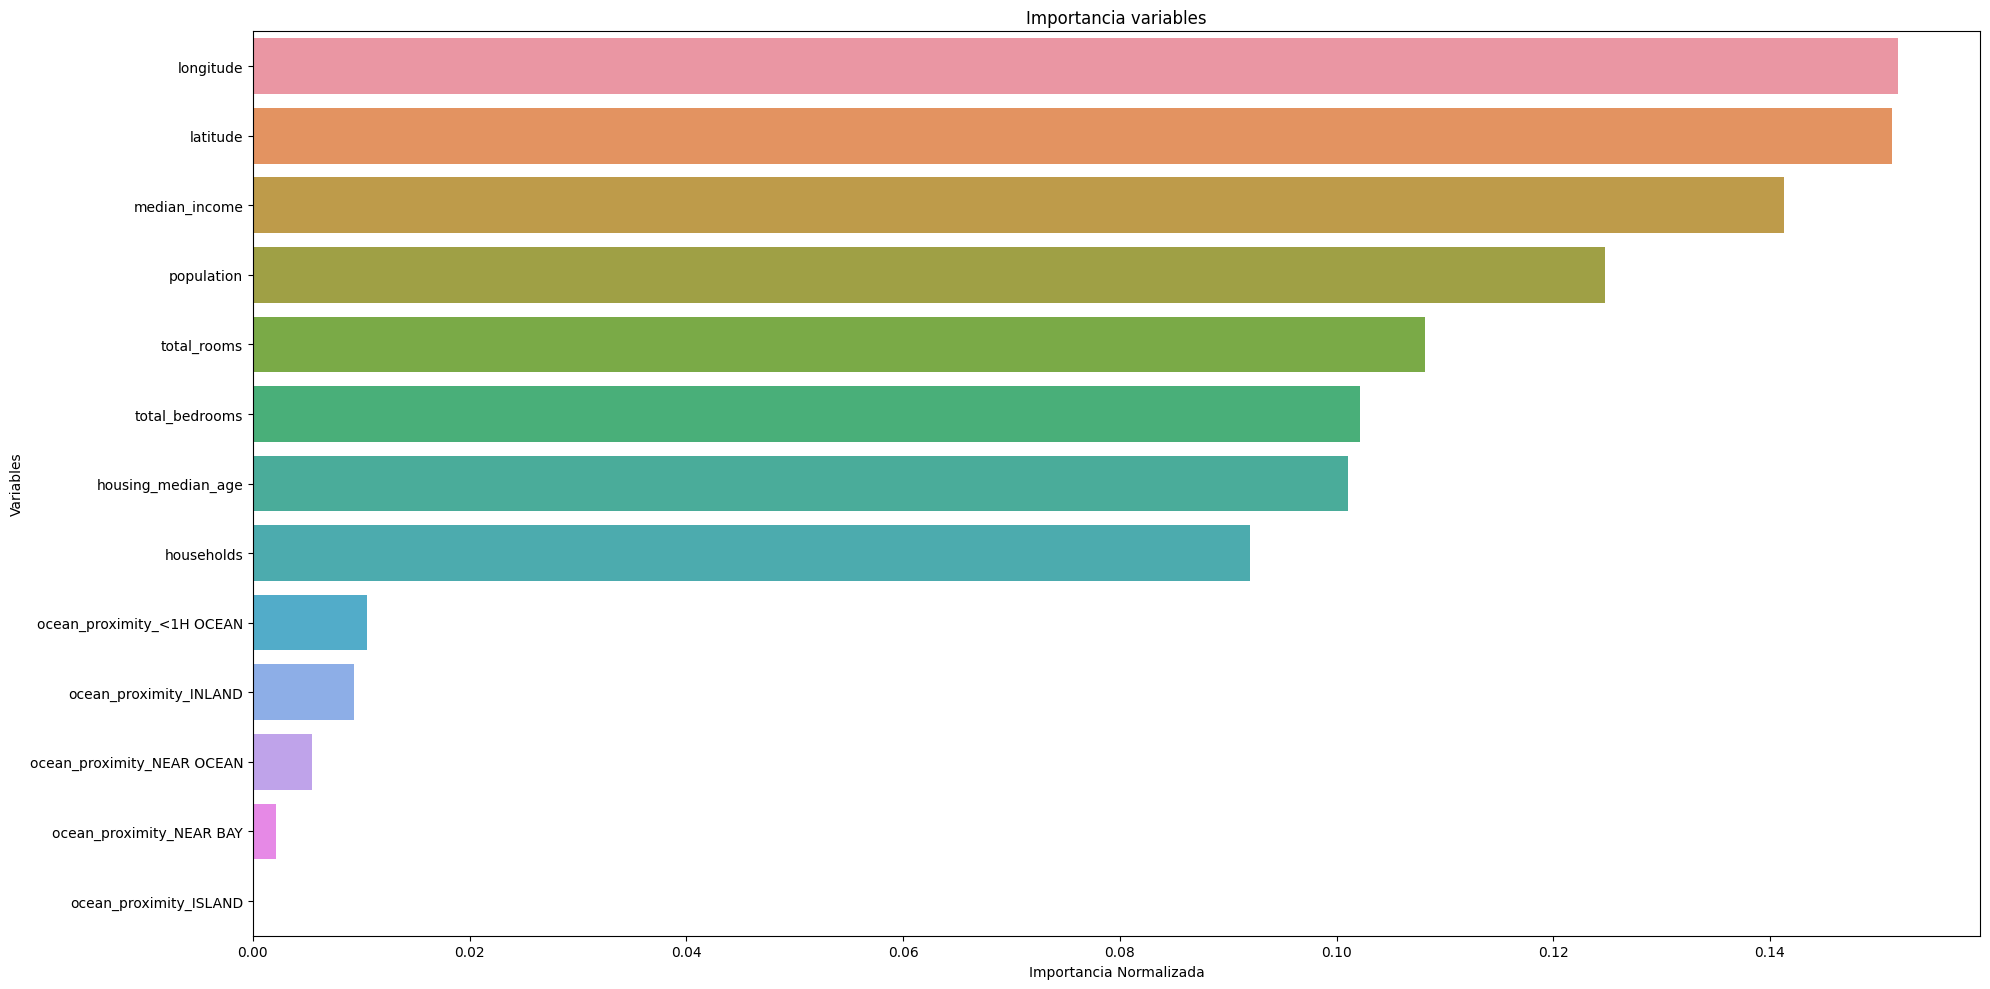

In [153]:
# Obtener los valores de importancia de características y los nombres de las características
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, x.columns), reverse=True), columns=['Value', 'Feature'])

# Calcular la suma total de las importancias
total_importance = feature_imp['Value'].sum()

# Normalizar los valores de importancia dividiendo por la suma total
feature_imp['Normalized_Value'] = feature_imp['Value'] / total_importance

# Grafico
plt.figure(figsize=(20, 10))
sns.barplot(x='Normalized_Value', y='Feature', data=feature_imp.sort_values(by='Normalized_Value', ascending=False))
plt.title('Importancia variables')
plt.ylabel('Variables')
plt.xlabel('Importancia Normalizada')
plt.tight_layout()

# Agregar más tics en el eje x
num_tics = 10  # Puedes ajustar este valor para agregar más o menos tics
tics_location = plt.MaxNLocator(num_tics)
plt.gca().xaxis.set_major_locator(tics_location)

plt.show()